In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from mpl_toolkits import mplot3d
import math
%matplotlib inline

# 0: Data Visualizing

Index(['feat_A', 'feat_C', 'feat_D', 'feat_E', 'feat_F', 'feat_G', 'feat_H',
       'feat_I', 'feat_K', 'feat_L', 'feat_M', 'feat_N', 'feat_P', 'feat_Q',
       'feat_R', 'feat_S', 'feat_T', 'feat_V', 'feat_W', 'feat_Y',
       'feat_DSSP_H', 'feat_DSSP_B', 'feat_DSSP_E', 'feat_DSSP_G',
       'feat_DSSP_I', 'feat_DSSP_T', 'feat_DSSP_S', 'feat_PHI', 'feat_PSI',
       'feat_TAU', 'feat_THETA', 'feat_BBSASA', 'feat_SCSASA', 'feat_pLDDT',
       'feat_DSSP_6', 'feat_DSSP_7', 'feat_DSSP_8', 'feat_DSSP_9',
       'feat_DSSP_10', 'feat_DSSP_11', 'feat_DSSP_12', 'feat_DSSP_13',
       'coord_X', 'coord_Y', 'coord_Z', 'entry', 'entry_index', 'Non_Polar',
       'Polar', 'Pos_Charge', 'Neg_Charge', 'y_Ligand'],
      dtype='object')


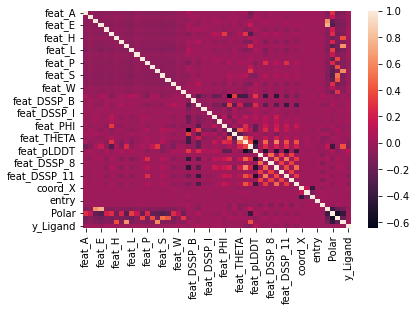

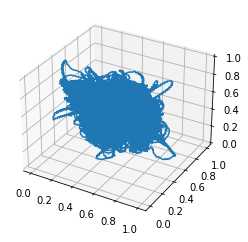

In [2]:
df = pd.read_csv("../DataSet/normalized4_dup.csv", index_col = 0)

print(df.columns)
df_feat_and_y = df
df_feat_and_y = df.loc[:,'feat_A':'y_Ligand']
sns.heatmap(df_feat_and_y.corr())
pic = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(df['coord_X'], df['coord_Y'], df['coord_Z'])

In [3]:
df.shape

(497166, 52)

# 1 Model 1: Using 4 Caterogries (Non-Polar, Polar, Pos Charge, Neg Charge)

In [4]:


# get labels for each proterin
labels = pd.DataFrame(df['y_Ligand'])
X = df[["Non_Polar", "Polar", "Pos_Charge", "Neg_Charge"]]

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.2)


In [5]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

score = logmodel.score(X_test, y_test)
print("The score is", score)
score = logmodel.score(X_train, y_train)
print("The score of train: ", score)

/Users/lebmond/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The score is 0.9655550415350886
The score of train:  0.9652303561191958


# 2 Model 2: Using All Features not in Model 1
Note that this one does not converge due to multi-colinearity or possibly too much features

In [6]:
# Using all features
labels = pd.DataFrame(df['y_Ligand'])
X2 = df.drop(["Non_Polar", "Polar", "Pos_Charge", "Neg_Charge", 'y_Ligand'], axis = 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, labels, test_size = 0.2)

In [7]:
logmodel = LogisticRegression()
logmodel.fit(X2_train, y2_train)

score = logmodel.score(X2_test, y2_test)
print("The score is", score)
score = logmodel.score(X2_train, y2_train)
print("The score of train: ", score)

/Users/lebmond/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/lebmond/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The score is 0.964851056982521
The score of train:  0.965406354027335
